In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ThreeLayerNet import *

In [2]:
convertPNG2JPG(path_list)
(x_train, t_train), (x_test, t_test) = read_image()

In [3]:
if __name__ == '__main__':
    print(np.shape(x_train), np.shape(t_train), np.shape(x_test), np.shape(t_test))
    print(len(x_train))

(920, 196608) (920,) (475, 196608) (475,)
920


In [4]:
train_suffle_index = np.random.permutation(len(x_train))
test_suffle_index = np.random.permutation(len(x_test))
(x_train, t_train), (x_test, t_test) = (x_train[train_suffle_index], t_train[train_suffle_index]), (x_test[test_suffle_index], t_test[test_suffle_index])

In [5]:
# ハイパーパラメータ
iterations = 300
train_size = x_train.shape[0]
batch_size = 5
learning_late = 0.01

In [6]:
if __name__ == '__main__':
    
    # カラーかグレースケールかの設定
    color = True
    
    if color:
        inputsize = 256*256*3
    else:
        inputsize = 256*256

In [7]:
'''
ThreeLayerNet_1 : ReLU-ReLU-Sigmoid
ThreeLayerNet_2 : ReLU-ReLU-Softmax
ThreeLayerNet_3 : Sigmoid-Sigmoid-Sigmoid

'''

network = ThreeLayerNet_1(input_size=inputsize, hidden_size=100, output_size=1, sigma=0.01)

In [8]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [9]:
for i in range(iterations):
    ##### 学習 #####
    batch = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch]
    t_batch = t_train[batch]
    
    grad = network._gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        # SGD
        #print(np.shape(network.params[key]))
        network.params[key] -= learning_late * grad[key]
        
    loss = network._loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    ##### 認識精度 #####
    if i % 10 == 0:
        #loss = network._loss(x_batch, t_batch)
        #train_loss_list.append(loss)
        train_acc = network._accuracy(x_train, t_train)
        test_acc = network._accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print([i], train_acc,',', test_acc, ',', loss)
        
print('---------- Done ----------')

[0] 0.5048067460827097 , 0.50590692882333 , 0.6853262039413777
[10] 0.6238828007710768 , 0.6496771266807777 , 0.41587043889197395
[20] 0.7800475148193616 , 0.8310316521758996 , 0.13137312805547247
[30] 0.7503790514312983 , 0.7962939089138502 , 0.40233367983154855
[40] 0.7652429012975643 , 0.8109449057025481 , 0.40248869920352853
[50] 0.739373501615961 , 0.7804990722746905 , 0.15089583616707192
[60] 0.8154823334928121 , 0.865530017677953 , 0.04266713611173905
[70] 0.7960125033099024 , 0.8428919384619782 , 0.4570965241683738
[80] 0.7351606731054718 , 0.7713868125589922 , 0.638226952434794
[90] 0.774396946900364 , 0.8148985368254665 , 0.33604439414725884
[100] 0.8276485710909215 , 0.875587280755213 , 0.017620013481682843
[110] 0.7657111075759194 , 0.8053086142818773 , 0.18396323641876108
[120] 0.8089134754363263 , 0.8544318305475859 , 0.18170409099791546
[130] 0.6992364602876365 , 0.7209279177221258 , 0.5919633280340363
[140] 0.7960344799483671 , 0.8355952926923648 , 0.11475264254455138
[

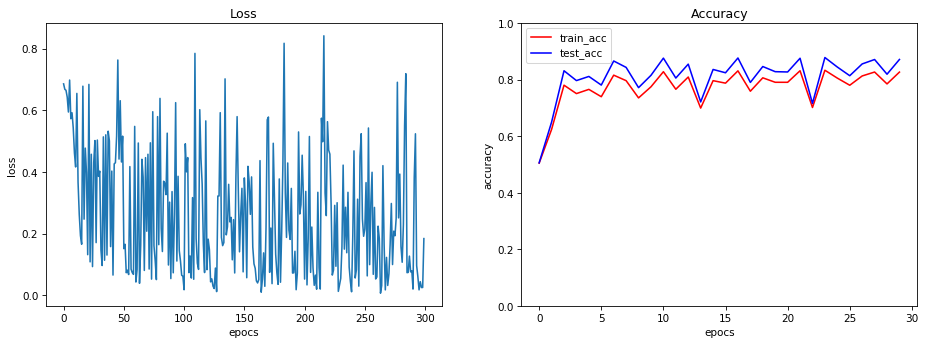

In [10]:
if __name__ == '__main__':
    
    plt.figure(figsize=(15, 5),dpi=75)
    
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(train_loss_list)), train_loss_list)
    plt.xlabel('epocs')
    plt.ylabel('loss')
    plt.title('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(train_acc_list)), train_acc_list, color='red', label='train_acc')
    plt.plot(np.arange(len(test_acc_list)), test_acc_list, color='blue', label='test_acc')
    plt.ylim(0, 1)
    plt.legend()
    plt.xlabel('epocs')
    plt.ylabel('accuracy')
    plt.title('Accuracy')
    
    plt.show()

In [11]:
##### テストデータでの評価 #####